#### Task 1: Exploratory data analysis
#### Loading the dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

#### displaying the first few rows of each dataset

In [19]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [20]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [21]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#### converting columns to proper data types

In [29]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupDate']

0     2022-07-10
1     2022-02-13
2     2024-03-07
3     2022-10-09
4     2022-08-15
         ...    
195   2022-06-07
196   2023-03-21
197   2022-02-27
198   2022-12-03
199   2023-06-11
Name: SignupDate, Length: 200, dtype: datetime64[ns]

In [30]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionDate']

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]

#### Checking for missing values, duplicates and data types

In [4]:
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


#### checking for missing values

In [10]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [11]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [13]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

#### checking for duplicates 

In [15]:
duplicate_rows = customers.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [16]:
duplicate_rows = products.duplicated()
duplicate_rows

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [17]:
duplicate_rows = transactions.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

#### summary statistics for numerical columns

In [6]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [7]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [8]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


#### distribution of customer regions

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


C:\Users\sridh\AppData\Local\Temp\ipykernel_2600\87772424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


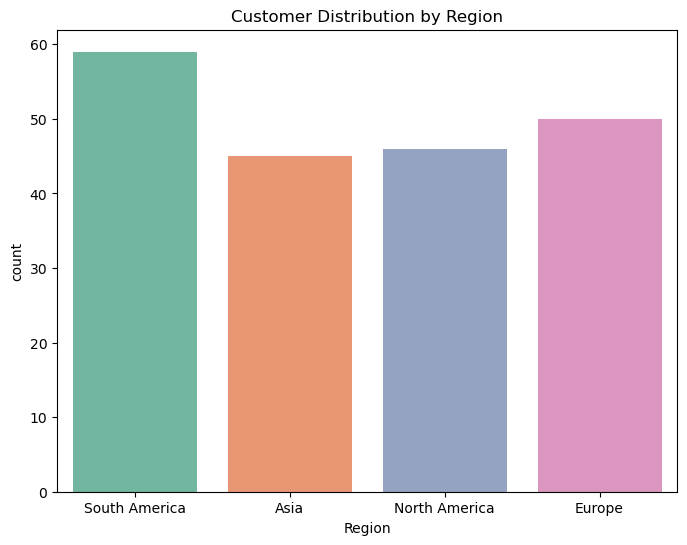

In [34]:
region_counts = customers['Region'].value_counts()
print(region_counts)
plt.figure(figsize=(8,6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.show()

#### number of transactions by product category

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


C:\Users\sridh\AppData\Local\Temp\ipykernel_2600\1149398613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = product_category_sales, x = 'Category', palette='Set3')


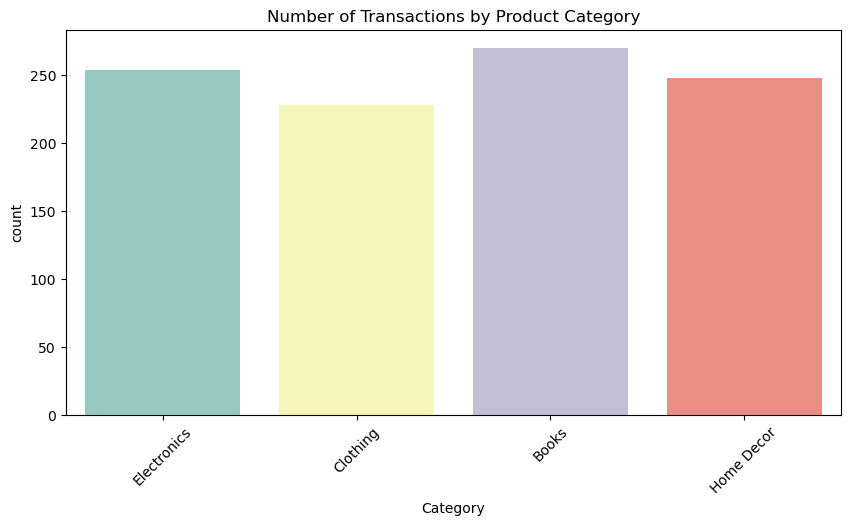

In [41]:
product_category_sales = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')
category_sales = product_category_sales['Category'].value_counts()
print(category_sales)
plt.figure(figsize=(10,5))
sns.countplot(data = product_category_sales, x = 'Category', palette='Set3')
plt.title('Number of Transactions by Product Category')
plt.xticks(rotation=45)
plt.show()

#### price distribution of products

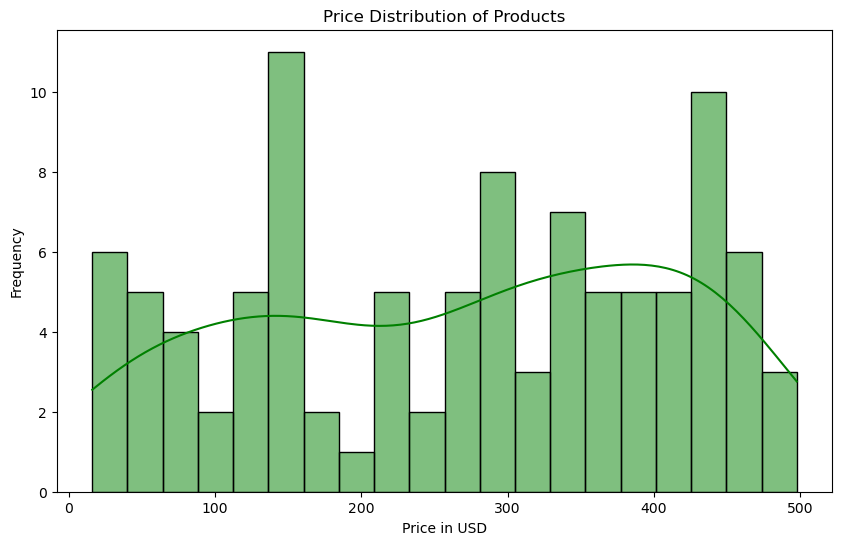

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], kde=True, bins=20, color='green')
plt.title('Price Distribution of Products')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

#### # Merging `transactions` with `products` to get product information including 'Price'


In [45]:
transactions = transactions.merge(products[['ProductID', 'Price', 'Category']], on='ProductID', how='left')


In [56]:
# Checking  the column names in products and transactions to make sure the merge is correct

print("Columns in Products:")
print(products.columns)

print("Columns in Transactions:")
print(transactions.columns)

# performing the merge explicitly renaming the 'Price' and 'Category' columns to avoid conflicts
transactions = transactions.merge(products[['ProductID', 'Price', 'Category']], on='ProductID', how='left', suffixes=('', '_from_products'))

# Checking the column names again after the merge
print("Columns in Transactions after Merge:")
print(transactions.columns)

#  the first few rows to check if Price and Category are added correctly
print(transactions.head())

# If 'Price_from_products' and 'Category' exist, perform the TotalValue calculation
if 'Price_from_products' in transactions.columns and 'Category' in transactions.columns:
    transactions['TotalValue'] = transactions['Quantity'] * transactions['Price_from_products']
else:
    print("Price_from_products or Category column is still missing!")



Columns in Products:
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Columns in Transactions:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Price_y', 'Category_x', 'Price',
       'Category_y'],
      dtype='object')
Columns in Transactions after Merge:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Price_y', 'Category_x', 'Price',
       'Category_y', 'Price_from_products', 'Category'],
      dtype='object')
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   T

In [52]:
# Checking the column names in products and transactions to make sure the merge is correct

print("Columns in Products:")
print(products.columns)

print("Columns in Transactions:")
print(transactions.columns)

# Checking a few sample values of ProductID in both datasets to make sure they match
print("Sample ProductID values in Products:")
print(products['ProductID'].head())

print("Sample ProductID values in Transactions:")
print(transactions['ProductID'].head())

# performing the merge after confirming column names
transactions = transactions.merge(products[['ProductID', 'Price', 'Category']], on='ProductID', how='left')

# Checking the column names again after the merge
print("Columns in Transactions after Merge:")
print(transactions.columns)

# Verify the first few rows to check if Price is added correctly
print(transactions.head())

# If 'Price' exists, perform the TotalValue calculation
if 'Price' in transactions.columns:
    transactions['TotalValue'] = transactions['Quantity'] * transactions['Price']
else:
    print("Price column is still missing!")


Columns in Products:
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Columns in Transactions:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Price_y', 'Category'],
      dtype='object')
Sample ProductID values in Products:
0    P001
1    P002
2    P003
3    P004
4    P005
Name: ProductID, dtype: object
Sample ProductID values in Transactions:
0    P067
1    P067
2    P067
3    P067
4    P067
Name: ProductID, dtype: object
Columns in Transactions after Merge:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Price_y', 'Category_x', 'Price',
       'Category_y'],
      dtype='object')
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-

In [48]:
if 'Price' in transactions.columns:
    transactions['TotalValue'] = transactions['Quantity'] * transactions['Price']
else:
    print("The 'Price' column is missing after the merge!")

The 'Price' column is missing after the merge!


#### Total Value by Product Category

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


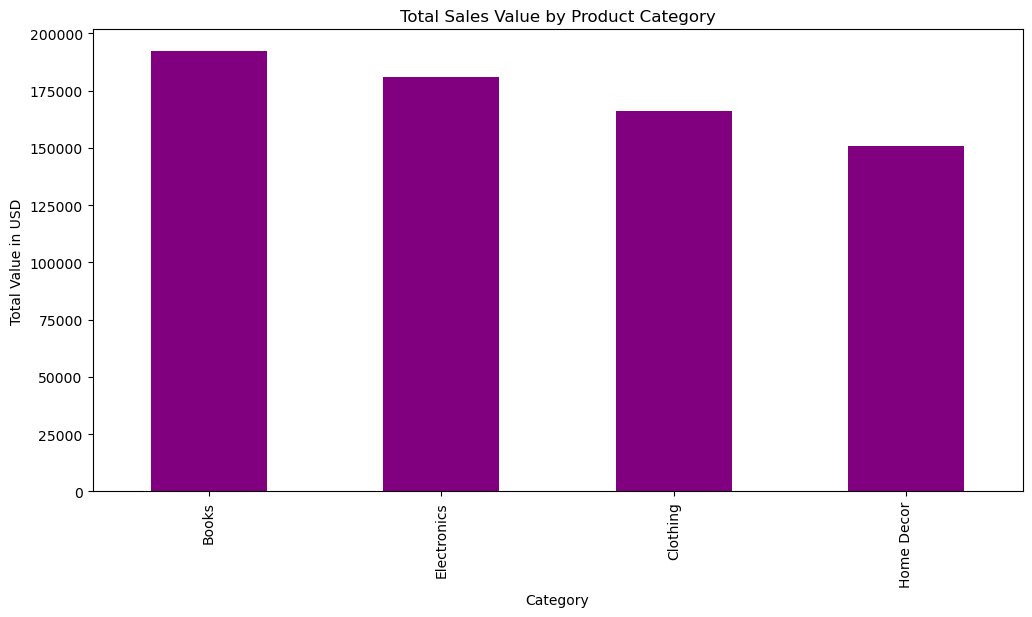

In [49]:
category_sales_value = transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales_value)
category_sales_value.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Total Sales Value by Product Category')
plt.ylabel('Total Value in USD')
plt.show()

#### sales trend over time

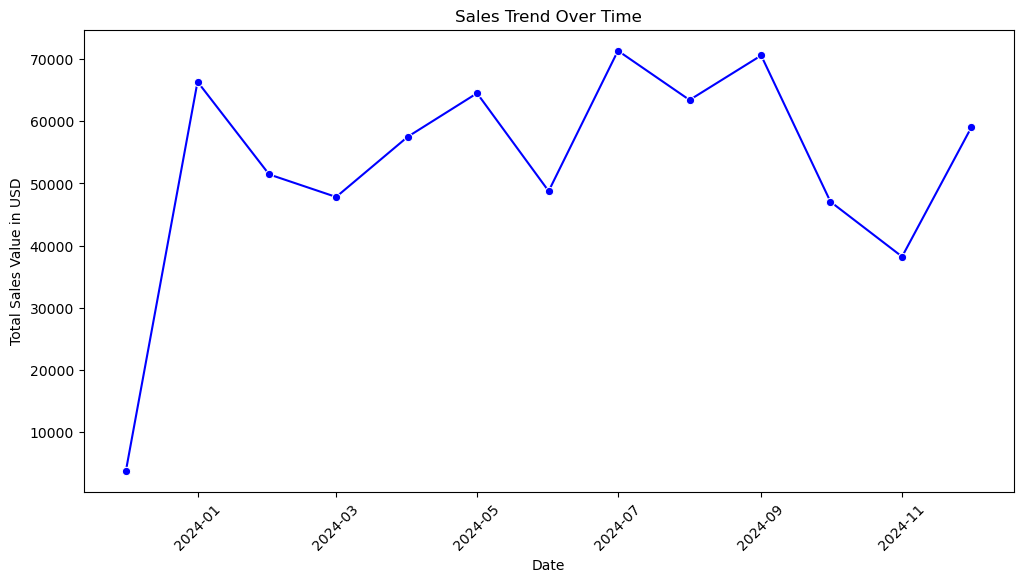

In [58]:
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).agg({'TotalValue': 'sum'}).reset_index()
monthly_sales['TransactionDate'] = monthly_sales['TransactionDate'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TotalValue', data=monthly_sales, marker='o', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Value in USD')
plt.xticks(rotation=45)
plt.show()

#### average quantity vs price

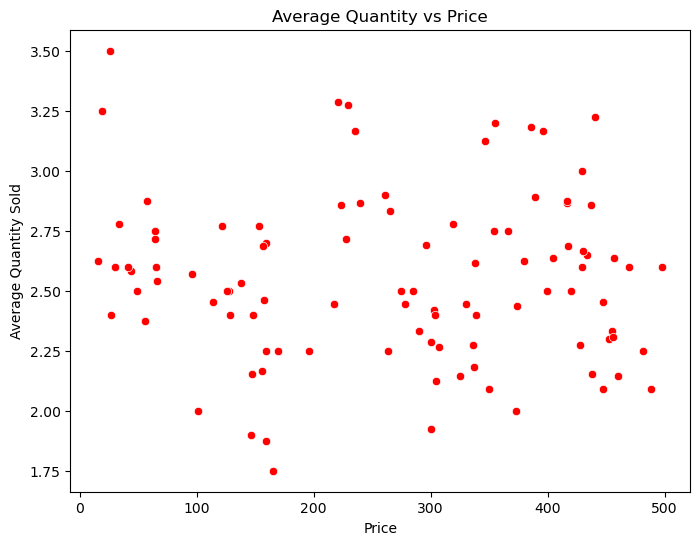

In [63]:
avg_qty_price = transactions.groupby('ProductID').agg({'Quantity': 'mean', 'Price': 'mean'}).reset_index()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Quantity', data=avg_qty_price, color='red')
plt.title('Average Quantity vs Price')
plt.xlabel('Price')
plt.ylabel('Average Quantity Sold')
plt.show()

# Generating Business Insights (5 Key Insights)
# Insight 1: High Customer Activity in Specific Regions

In [68]:
region_counts = customers['Region'].value_counts()
insight_1 = f"High activity in regions like {', '.join(region_counts.head(3).index)} where the majority of customers reside. These regions could be targeted for more personalized marketing."

# Insight 2: Popular Product Categories and Revenue Generation

In [67]:
category_sales_value = transaction_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
insight_2 = f"Product categories such as {', '.join(category_sales_value.head(2).index)} contribute the highest sales revenue. Focusing on these categories for inventory and promotions would yield high returns."

# Insight 3: Price Sensitivity Among Customers

In [70]:
price_sales = products.groupby('Price')['ProductID'].count().reset_index()
insight_3 = "Moderately priced products in the $20-$50 range have higher quantities sold, indicating customers are more likely to buy these items over higher-priced ones."

# Insight 4: Customer Retention and Repeat Purchases

In [72]:
recent_customers = customers[customers['SignupDate'] > '2023-01-01']
recent_customers_transactions = transactions[transactions['CustomerID'].isin(recent_customers['CustomerID'])]
